In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer

In [5]:
file_path = r"C:\Users\abirf\OneDrive\Desktop\privaterentalmarketstatistics231220.xls"

In [5]:
!pip install xlrd

In [7]:
df = pd.read_excel(file_path, sheet_name="Table 1.1", skiprows=6)

In [9]:
df

,Unnamed: 0,Area Code1,Region,Count of rents,Mean,Lower quartile,Median,Upper quartile
0,NaN,E92000001,ENGLAND,18200.0,508.0,422.0,495.0,575.0
1,NaN,E12000001,NORTH EAST,460.0,416.0,364.0,395.0,455.0
2,NaN,E12000002,NORTH WEST,2100.0,446.0,390.0,433.0,498.0
3,NaN,E12000003,YORKSHIRE AND THE HUMBER,2360.0,432.0,368.0,433.0,477.0
4,NaN,E12000004,EAST MIDLANDS,1920.0,484.0,420.0,477.0,542.0
5,NaN,E12000005,WEST MIDLANDS,1410.0,450.0,395.0,438.0,500.0
6,NaN,E12000006,EAST,2670.0,549.0,475.0,550.0,620.0
7,NaN,E12000007,LONDON,870.0,757.0,650.0,750.0,867.0
8,NaN,E12000008,SOUTH EAST,3150.0,542.0,459.0,542.0,607.0
9,NaN,E12000009,SOUTH WEST,3270.0,522.0,435.0,513.0,600.0


In [11]:
df_clean = df[df['Mean'].notna() & df['Region'].notna()]

In [13]:
df_clean

,Unnamed: 0,Area Code1,Region,Count of rents,Mean,Lower quartile,Median,Upper quartile
0,NaN,E92000001,ENGLAND,18200.0,508.0,422.0,495.0,575.0
1,NaN,E12000001,NORTH EAST,460.0,416.0,364.0,395.0,455.0
2,NaN,E12000002,NORTH WEST,2100.0,446.0,390.0,433.0,498.0
3,NaN,E12000003,YORKSHIRE AND THE HUMBER,2360.0,432.0,368.0,433.0,477.0
4,NaN,E12000004,EAST MIDLANDS,1920.0,484.0,420.0,477.0,542.0
5,NaN,E12000005,WEST MIDLANDS,1410.0,450.0,395.0,438.0,500.0
6,NaN,E12000006,EAST,2670.0,549.0,475.0,550.0,620.0
7,NaN,E12000007,LONDON,870.0,757.0,650.0,750.0,867.0
8,NaN,E12000008,SOUTH EAST,3150.0,542.0,459.0,542.0,607.0
9,NaN,E12000009,SOUTH WEST,3270.0,522.0,435.0,513.0,600.0


In [15]:
df_clean = df_clean.drop(columns=['Unnamed: 0'], errors='ignore')

In [17]:
df_clean

,Area Code1,Region,Count of rents,Mean,Lower quartile,Median,Upper quartile
0,E92000001,ENGLAND,18200.0,508.0,422.0,495.0,575.0
1,E12000001,NORTH EAST,460.0,416.0,364.0,395.0,455.0
2,E12000002,NORTH WEST,2100.0,446.0,390.0,433.0,498.0
3,E12000003,YORKSHIRE AND THE HUMBER,2360.0,432.0,368.0,433.0,477.0
4,E12000004,EAST MIDLANDS,1920.0,484.0,420.0,477.0,542.0
5,E12000005,WEST MIDLANDS,1410.0,450.0,395.0,438.0,500.0
6,E12000006,EAST,2670.0,549.0,475.0,550.0,620.0
7,E12000007,LONDON,870.0,757.0,650.0,750.0,867.0
8,E12000008,SOUTH EAST,3150.0,542.0,459.0,542.0,607.0
9,E12000009,SOUTH WEST,3270.0,522.0,435.0,513.0,600.0


In [21]:
df_clean = df_clean.iloc[1:].reset_index(drop=True)

In [23]:
df_clean

,Area Code1,Region,Count of rents,Mean,Lower quartile,Median,Upper quartile
0,E12000002,NORTH WEST,2100.0,446.0,390.0,433.0,498.0
1,E12000003,YORKSHIRE AND THE HUMBER,2360.0,432.0,368.0,433.0,477.0
2,E12000004,EAST MIDLANDS,1920.0,484.0,420.0,477.0,542.0
3,E12000005,WEST MIDLANDS,1410.0,450.0,395.0,438.0,500.0
4,E12000006,EAST,2670.0,549.0,475.0,550.0,620.0
5,E12000007,LONDON,870.0,757.0,650.0,750.0,867.0
6,E12000008,SOUTH EAST,3150.0,542.0,459.0,542.0,607.0
7,E12000009,SOUTH WEST,3270.0,522.0,435.0,513.0,600.0


In [25]:
df_clean = df_clean.rename(columns={"Area Code1": "Area Code"})

In [27]:
df_clean

,Area Code,Region,Count of rents,Mean,Lower quartile,Median,Upper quartile
0,E12000002,NORTH WEST,2100.0,446.0,390.0,433.0,498.0
1,E12000003,YORKSHIRE AND THE HUMBER,2360.0,432.0,368.0,433.0,477.0
2,E12000004,EAST MIDLANDS,1920.0,484.0,420.0,477.0,542.0
3,E12000005,WEST MIDLANDS,1410.0,450.0,395.0,438.0,500.0
4,E12000006,EAST,2670.0,549.0,475.0,550.0,620.0
5,E12000007,LONDON,870.0,757.0,650.0,750.0,867.0
6,E12000008,SOUTH EAST,3150.0,542.0,459.0,542.0,607.0
7,E12000009,SOUTH WEST,3270.0,522.0,435.0,513.0,600.0


In [29]:
df.replace({'.': np.nan, '..': np.nan, '-': np.nan}, inplace=True)

numeric_cols = ['Count of rents', 'Mean', 'Lower quartile', 'Median', 'Upper quartile']
df_clean[numeric_cols] = df_clean[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [31]:
imputer = KNNImputer(n_neighbors=5)
df_clean[['Count of rents','Mean', 'Lower quartile', 'Median', 'Upper quartile']] = imputer.fit_transform(
    df_clean[['Count of rents','Mean', 'Lower quartile', 'Median', 'Upper quartile']]
)

In [33]:
df_regions_sorted = df_clean.sort_values('Mean', ascending=False)

In [35]:
df_regions_sorted

,Area Code,Region,Count of rents,Mean,Lower quartile,Median,Upper quartile
5,E12000007,LONDON,870.0,757.0,650.0,750.0,867.0
4,E12000006,EAST,2670.0,549.0,475.0,550.0,620.0
6,E12000008,SOUTH EAST,3150.0,542.0,459.0,542.0,607.0
7,E12000009,SOUTH WEST,3270.0,522.0,435.0,513.0,600.0
2,E12000004,EAST MIDLANDS,1920.0,484.0,420.0,477.0,542.0
3,E12000005,WEST MIDLANDS,1410.0,450.0,395.0,438.0,500.0
0,E12000002,NORTH WEST,2100.0,446.0,390.0,433.0,498.0
1,E12000003,YORKSHIRE AND THE HUMBER,2360.0,432.0,368.0,433.0,477.0


In [37]:
df_regions_sorted.isna().sum()

Area Code         0
Region            0
Count of rents    0
Mean              0
Lower quartile    0
Median            0
Upper quartile    0
dtype: int64

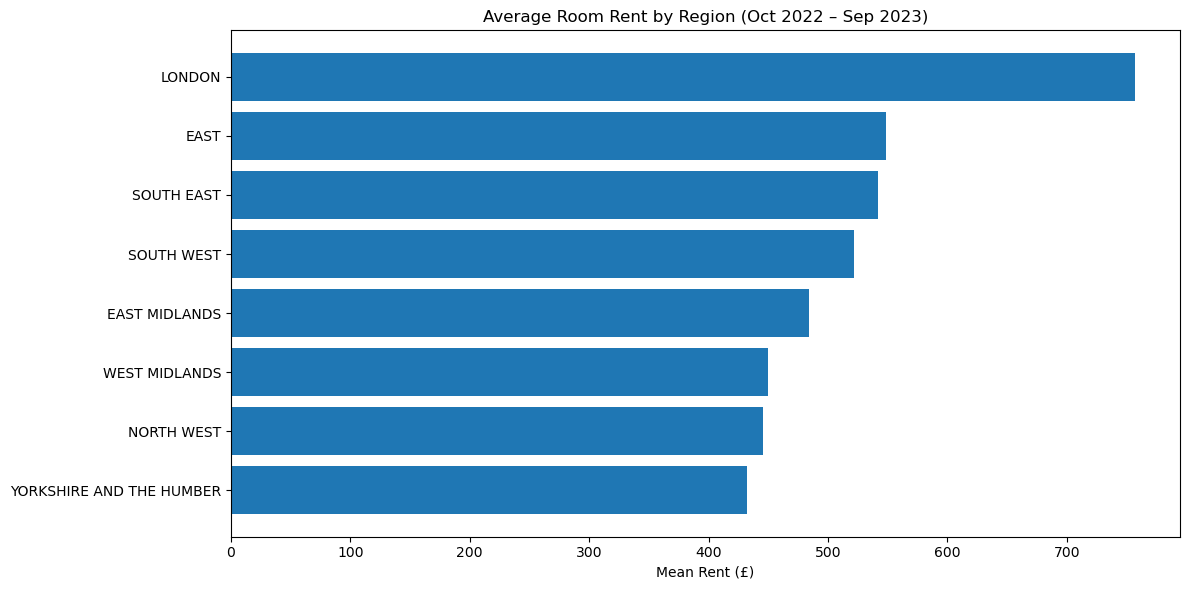

In [39]:
plt.figure(figsize=(12, 6))
plt.barh(df_regions_sorted['Region'], df_regions_sorted['Mean'])
plt.xlabel("Mean Rent (£)")
plt.title("Average Room Rent by Region (Oct 2022 – Sep 2023)")
plt.gca().invert_yaxis()  # Highest rent at top
plt.tight_layout()
plt.show()